In [496]:
print("womp womp")

womp womp
time: 0 ns (started: 2023-12-13 22:07:54 -05:00)


In [497]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.optim as optim
from collections import OrderedDict
from torchvision import datasets
from torchvision import transforms
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2023-12-13 22:07:54 -05:00)


In [498]:
file_path = r"C:\Users\aaron\Documents\Python Code\Datasets\Heart Attack Risk Predicition\heart_attack_prediction_dataset.csv"

heart_attack = pd.read_csv(file_path)

oversample = RandomOverSampler(random_state=42)  # You can adjust parameters if needed

heart_attack.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,Male,208,158,72,0,0,1,0,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,Male,389,165,98,1,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,Female,324,174,72,1,0,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,Male,383,163,73,1,1,1,0,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,Male,318,91,93,1,1,1,1,0,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


time: 31 ms (started: 2023-12-13 22:07:54 -05:00)


In [499]:
#Defining mapping function to map multiple inputs of the dataset
def gender_map(x):
    return x.map({'M': 1, 'F': 0, 'Male' : 1, "Female" : 0, '1' : 1, '0' : 0})

def hemisphere_map(x):
    return x.map({'Southern Hemisphere' : -1, 'Northern Hemisphere' : 1})

def countries_map(x):
    return x.map({'Argentina' : -1, 'Brazil' : -1, 'China' : -1, 'Colombia' : -1,
    'India' : -1, 'Nigeria' : -1, 'South Africa' : -1, 'South Korea' : -1, 'Thailand' : -1,
    'Vietnam' : -1, 'Australia' : 1, 'Canada' : 1, 'France' : 1, 'Germany' : 1,
    'Italy' : 1, 'Japan' : 1, 'New Zealand' : 1, 'Spain' : 1, 'United Kingdom' : 1,
    'United States' : 1})

def diet_map(x):
    return x.map({'Unhealthy' : -1, 'Average' : 0, 'Healthy' : 1})

def continent_map(x):
    return x.map({'Asia' : 0, 'Africa' : 1, 'Europe' : 2, 'North America' : 3,
    'South America' : 4, 'Australia' : 5})

time: 16 ms (started: 2023-12-13 22:07:54 -05:00)


In [500]:
heart_attack['Sex'] = heart_attack[['Sex']].apply(gender_map)
heart_attack['Hemisphere'] = heart_attack[['Hemisphere']].apply(hemisphere_map)
heart_attack['Country'] = heart_attack[['Country']].apply(countries_map)
heart_attack['Diet'] = heart_attack[['Diet']].apply(diet_map)
heart_attack['Continent'] = heart_attack[['Continent']].apply(continent_map)

unique_sex = heart_attack['Sex'].unique()
print(unique_sex)
unique = heart_attack['Hemisphere'].unique()
print(unique)
unique_country = heart_attack['Country'].unique()
print(unique_country)
unique_diet = heart_attack['Diet'].unique()
print(unique_diet)
unique_continent = heart_attack['Continent'].unique()
print(unique_continent)

heart_attack.head()

[1 0]
[-1  1]
[-1  1]
[ 0 -1  1]
[4 3 2 0 1 5]


,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,1,208,158,72,0,0,1,0,0,...,6.615001,261404,31.251233,286,0,6,-1,4,-1,0
1,21,1,389,165,98,1,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,1,3,1,0
2,21,0,324,174,72,1,0,0,0,0,...,9.463426,235282,28.176571,587,4,4,1,2,1,0
3,84,1,383,163,73,1,1,1,0,1,...,7.648981,125640,36.464704,378,3,4,1,3,1,0
4,66,1,318,91,93,1,1,1,1,0,...,1.514821,160555,21.809144,231,1,5,-1,0,1,0


time: 15 ms (started: 2023-12-13 22:07:54 -05:00)


In [501]:
# Defining PCA function
def PCA_function(X_train, X_val, K):
  pca = PCA(n_components=K)
  X_train_PCA = pca.fit_transform(X_train)
  X_val_PCA = pca.fit_transform(X_val)
  return X_train_PCA, X_val_PCA

time: 0 ns (started: 2023-12-13 22:07:54 -05:00)


In [502]:
# Extract 4 shared features between all datasets and target
X = heart_attack[['Sex', 'Age', 'Cholesterol', 'Heart Attack Risk', 'Blood Pressure']].values

y_diab = heart_attack[['Diabetes']].values.reshape(-1, 1)
y_obesity = heart_attack[['Obesity']].values.reshape(-1, 1)
y_alcCon = heart_attack[['Alcohol Consumption']].values.reshape(-1, 1)
y_ExHrsPrWk = heart_attack[['Exercise Hours Per Week']].values.reshape(-1, 1)
y_diet = heart_attack[['Diet']].values.reshape(-1, 1)
y_previousHeartProb = heart_attack[['Previous Heart Problems']].values.reshape(-1, 1)
y_continent = heart_attack[['Continent']].values.reshape(-1, 1)
y_hr = heart_attack['Heart Rate'].values.reshape(-1, 1)
y_famHist = heart_attack['Family History'].values.reshape(-1, 1)
y_smoking = heart_attack['Smoking'].values.reshape(-1, 1)
y_hemis = heart_attack['Hemisphere'].values.reshape(-1, 1)
y_medUse = heart_attack['Medication Use'].values.reshape(-1, 1)
y_stressLvl = heart_attack['Stress Level'].values.reshape(-1, 1)
y_sedHrs = heart_attack['Sedentary Hours Per Day'].values.reshape(-1, 1)
y_income = heart_attack['Income'].values.reshape(-1, 1)
y_bmi = heart_attack['BMI'].values.reshape(-1, 1)
y_trig = heart_attack['Triglycerides'].values.reshape(-1, 1)
y_phyDays = heart_attack['Physical Activity Days Per Week'].values.reshape(-1, 1)
y_sleepHrs = heart_attack['Sleep Hours Per Day'].values.reshape(-1, 1)
y_country = heart_attack['Country'].values.reshape(-1, 1)

# Normalize data using Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add intercept term to features
X_scaled = np.hstack((np.ones((len(y_diab), 1)), X_scaled))

# Split the data into training and testing sets
X_train_diab, X_test_diab, y_train_diab, y_test_diab = train_test_split(X_scaled, y_diab, test_size=0.2, random_state=0)

# Split the data into training and testing sets
X_train_obesity, X_test_obesity, y_train_obesity, y_test_obesity = train_test_split(X_scaled, y_obesity, test_size=0.2, random_state=0)

# Split the data into training and testing sets
X_train_alcCon, X_test_alcCon, y_train_alcCon, y_test_alcCon = train_test_split(X_scaled, y_alcCon, test_size=0.2, random_state=0)

# Split the data into training and testing sets
X_train_ExHrsPrWk, X_test_ExHrsPrWk, y_train_ExHrsPrWk, y_test_ExHrsPrWk = train_test_split(X_scaled, y_ExHrsPrWk, test_size=0.2, random_state=0)

# Split the data into training and testing sets
X_train_diet, X_test_diet, y_train_diet, y_test_diet = train_test_split(X_scaled, y_diet, test_size=0.2, random_state=0)

# Split the data into training and testing sets
X_train_previousHeartProb, X_test_previousHeartProb, y_train_previousHeartProb, y_test_previousHeartProb = train_test_split(X_scaled, y_previousHeartProb, test_size=0.2, random_state=0)

# Split the data into training and testing sets
X_train_continent, X_test_continent, y_train_continent, y_test_continent = train_test_split(X_scaled, y_continent, test_size=0.2, random_state=0)

# Split the data into training and testing sets
X_train_hr, X_test_hr, y_train_hr, y_test_hr = train_test_split(X_scaled, y_hr, test_size=0.2, random_state=0)

# Split the data into training and testing sets
X_train_famHist, X_test_famHist, y_train_famHist, y_test_famHist = train_test_split(X_scaled, y_famHist, test_size=0.2, random_state=0)

# Split the data into training and testing sets
X_train_smoking, X_test_smoking, y_train_smoking, y_test_smoking = train_test_split(X_scaled, y_smoking, test_size=0.2, random_state=0)

# Split the data into training and testing sets
X_train_hemis, X_test_hemis, y_train_hemis, y_test_hemis = train_test_split(X_scaled, y_hemis, test_size=0.2, random_state=0)

# Split the data into training and testing sets
X_train_medUse, X_test_medUse, y_train_medUse, y_test_medUse = train_test_split(X_scaled, y_medUse, test_size=0.2, random_state=0)

# Split the data into training and testing sets
X_train_stressLvl, X_test_stressLvl, y_train_stressLvl, y_test_stressLvl = train_test_split(X_scaled, y_stressLvl, test_size=0.2, random_state=0)

# Split the data into training and testing sets
X_train_sedHrs, X_test_sedHrs, y_train_sedHrs, y_test_sedHrs = train_test_split(X_scaled, y_sedHrs, test_size=0.2, random_state=0)

# Split the data into training and testing sets
X_train_income, X_test_income, y_train_income, y_test_income = train_test_split(X_scaled, y_income, test_size=0.2, random_state=0)

# Split the data into training and testing sets
X_train_bmi, X_test_bmi, y_train_bmi, y_test_bmi = train_test_split(X_scaled, y_bmi, test_size=0.2, random_state=0)

# Split the data into training and testing sets
X_train_trig, X_test_trig, y_train_trig, y_test_trig = train_test_split(X_scaled, y_trig, test_size=0.2, random_state=0)

# Split the data into training and testing sets
X_train_phyDays, X_test_phyDays, y_train_phyDays, y_test_phyDays = train_test_split(X_scaled, y_phyDays, test_size=0.2, random_state=0)

# Split the data into training and testing sets
X_train_sleepHrs, X_test_sleepHrs, y_train_sleepHrs, y_test_sleepHrs = train_test_split(X_scaled, y_sleepHrs, test_size=0.2, random_state=0)

# Split the data into training and testing sets
X_train_country, X_test_country, y_train_country, y_test_country = train_test_split(X_scaled, y_country, test_size=0.2, random_state=0)

# Initialize logistic regression model
logistic_model = LogisticRegression(penalty = 'l2', max_iter = 10000, random_state = 0)


# X_train_resampled_diab, y_train_resampled_diab = oversample.fit_resample(X_train_diab, y_train_diab)

F1_at_K = 0
K_vector = []
F1_score_vector = []

# model_sig = SVC(kernel='sigmoid', C=1E7)

for K in range(1, 5):
  X_train_PCA, X_test_PCA = PCA_function(X_train_diab, X_test_diab, K)

  logistic_model.fit(X_train_PCA, y_train_diab)
  Y_pred = logistic_model.predict(X_test_PCA)

  K_vector.append(K)
#   recall_vector.append(metrics.recall_score(Y_test, Y_pred_sig))
#   precision_vector.append(metrics.precision_score(Y_test, Y_pred_sig))
#   accuracy_vector.append(metrics.accuracy_score(Y_test, Y_pred_sig))
  F1_score_vector.append(metrics.f1_score(y_test_diab, Y_pred))

  if (metrics.f1_score(y_test_diab, Y_pred) > F1_at_K):
    F1_at_K = metrics.accuracy_score(y_test_diab, Y_pred)
    best_K = K


X_train_PCA_diab, X_test_PCA_diab = PCA_function(X_train_diab, X_test_diab, best_K)

# Fit the model on balanced data after SMOTE
logistic_diab = logistic_model.fit(X_train_PCA_diab, y_train_diab)

# Predict on the original test set
y_pred_diab = logistic_model.predict(X_test_PCA_diab)

# Calculate evaluation metrics
accuracy_diab = accuracy_score(y_test_diab, y_pred_diab)
precision_diab = precision_score(y_test_diab, y_pred_diab)
recall_diab = recall_score(y_test_diab, y_pred_diab)
f1_diab = f1_score(y_test_diab, y_pred_diab)

# Print evaluation metrics
print("Accuracy:", accuracy_diab)
print("Precision:", precision_diab)
print("Recall:", recall_diab)
print("F1 Score:", f1_diab)

print(y_pred_diab[0:9])

# logistic_diab = logistic_model.fit(X_train_diab, y_train_diab)
# logistic_obesity = logistic_model.fit(X_train_diab, y_train_obesity)
# logistic_alcCon = logistic_model.fit(X_train_diab, y_train_alcCon)
# logistic_ExHrsPrWk = logistic_model.fit(X_train_diab, y_train_ExHrsPrWk)
# logistic_diet = logistic_model.fit(X_train_diab, y_train_diet)
# logistic_previousHeartProb = logistic_model.fit(X_train_diab, y_train_previousHeartProb)
# logistic_continent = logistic_model.fit(X_train_diab, y_train_continent)
# logistic_hr = logistic_model.fit(X_train_diab, y_train_hr)
# logistic_famHist = logistic_model.fit(X_train_diab, y_train_famHist)
# logistic_smoking = logistic_model.fit(X_train_diab, y_train_smoking)
# logistic_hemis = logistic_model.fit(X_train_diab, y_train_hemis)
# logistic_medUse = logistic_model.fit(X_train_diab, y_train_medUse)
# logistic_stressLvl = logistic_model.fit(X_train_diab, y_train_stressLvl)
# logistic_sedHrs = logistic_model.fit(X_train_diab, y_train_sedHrs)
# logistic_income = logistic_model.fit(X_train_diab, y_train_income)
# logistic_bmi = logistic_model.fit(X_train_diab, y_train_bmi)
# logistic_trig = logistic_model.fit(X_train_diab, y_train_trig)
# logistic_phyDays = logistic_model.fit(X_train_diab, y_train_diab)
# logistic_sleepHrs = logistic_model.fit(X_train_diab, y_train_sleepHrs)
# logistic_country = logistic_model.fit(X_train_diab, y_train_country)


# y_pred_obesity = logistic_model.predict(X_test_obesity)
# y_pred_alcCon = logistic_model.predict(X_test_alcCon)
# y_pred_ExHrsPrWk = logistic_model.predict(X_test_ExHrsPrWk)
# y_pred_diet= logistic_model.predict(X_test_diet)
# y_pred_previousHeartProb = logistic_model.predict(X_test_previousHeartProb)
# y_pred_continent = logistic_model.predict(X_test_continent)
# y_pred_hr = logistic_model.predict(X_test_hr)
# y_pred_famHist = logistic_model.predict(X_test_famHist)
# y_pred_smoking = logistic_model.predict(X_test_smoking)
# y_pred_hemis = logistic_model.predict(X_test_hemis)
# y_pred_medUse = logistic_model.predict(X_test_medUse)
# y_pred_stressLvl = logistic_model.predict(X_test_stressLvl)
# y_pred_sedHrs = logistic_model.predict(X_test_sedHrs)
# y_pred_income = logistic_model.predict(X_test_income)
# y_pred_bmi = logistic_model.predict(X_test_bmi)
# y_pred_trig = logistic_model.predict(X_test_trig)
# y_pred_phyDays = logistic_model.predict(X_test_phyDays)
# y_pred_sleepHrs = logistic_model.predict(X_test_sleepHrs)
# y_pred_country = logistic_model.predict(X_test_country)

Accuracy: 0.6417569880205363
Precision: 0.6417569880205363
Recall: 1.0
F1 Score: 0.7817929117442669
[1 1 1 1 1 1 1 1 1]
time: 62 ms (started: 2023-12-13 22:07:54 -05:00)


c:\Users\aaron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aaron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aaron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\aaron\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataC

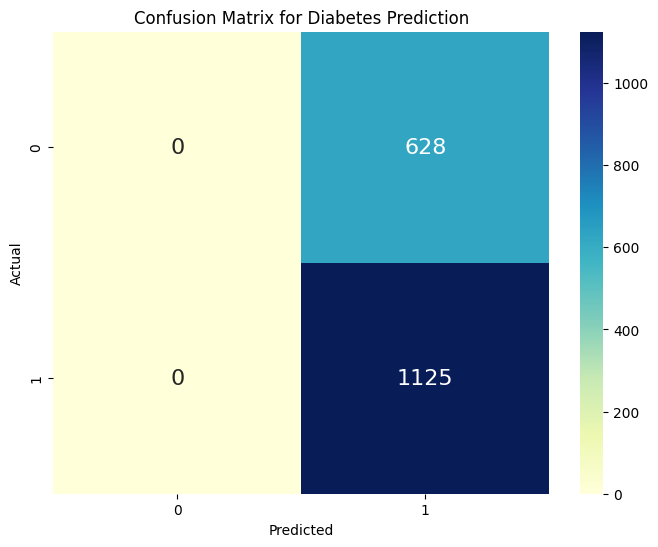

time: 79 ms (started: 2023-12-13 22:07:54 -05:00)


In [503]:
# Get the confusion matrix
conf_matrix = confusion_matrix(y_test_diab, y_pred_diab)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt='g', annot_kws={"size": 16})

# Adding labels, title, and ticks
plt.title('Confusion Matrix for Diabetes Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [504]:
for index, row in heart_attack.iterrows():
    # print(row)
    for column in heart_attack.columns:
        # print(heart_attack.loc[index, column])
        if pd.isnull(heart_attack.at[index, column]):  # Check for empty cells
            # If cell is empty, predict using the logistic regression model
            prediction = logistic_model.predict(heart_attack.loc[index, :5])[0]
            # Fill the empty cell with the prediction
            heart_attack.at[index, column] = prediction
            print(row)

# heart_attack.head()

# print(heart_attack.iloc[0, :5])

print(row.shape)

67
1
208
158
72
0
0
1
0
0
4.168188835442079
0
0
0
9
6.61500145291406
261404
31.2512327252954
286
0
6
-1
4
-1
0
21
1
389
165
98
1
1
1
1
1
1.8132416178634456
-1
1
0
1
4.963458839757678
285768
27.19497335
235
1
7
1
3
1
0
21
0
324
174
72
1
0
0
0
0
2.0783529861178884
1
1
1
9
9.463425838029828
235282
28.176570683909876
587
4
4
1
2
1
0
84
1
383
163
73
1
1
1
0
1
9.828129593
0
1
0
9
7.648980824461007
125640
36.464704293082846
378
3
4
1
3
1
0
66
1
318
91
93
1
1
1
1
0
5.804298820315434
-1
1
0
6
1.5148209264291386
160555
21.809144180619757
231
1
5
-1
0
1
0
54
0
297
172
48
1
1
1
0
1
0.6250080237057354
-1
1
1
2
7.798752408582432
241339
20.14683950301005
795
5
10
1
2
1
1
90
1
358
102
84
0
0
1
0
1
4.098177090985471
1
0
0
7
0.6273560009569512
190450
28.885810606590454
284
4
10
1
3
1
1
84
1
220
131
107
0
0
1
1
1
3.427928754300873
0
0
1
4
10.54378023926684
122093
22.22186174
370
6
7
1
0
1
1
20
1
145
144
68
1
0
1
1
0
16.868302239450017
0
0
0
5
11.348786873498993
25086
35.80990131909641
790
7
4
-1
4
-1
0
4